# Analisi Esplorativa dei Dati (EDA)
In questa sezione, esploreremo i dati per capire meglio le loro caratteristiche.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#carica csv pulito
df = pd.read_csv('ai_vs_human_dataset_cleaned.csv')

In [3]:
df.head()

,label,topic,text,length_chars,length_words,quality_score,sentiment,plagiarism_score,cleaned_text
0,human,food,"As someone who follows food, I believe privacy...",126,22,2.37,0.44,0.045,someone follows food believe privacy concerns ...
1,ai,travel,Analysis indicates that travel is associated w...,141,19,3.44,0.60,0.007,analysis indicates travel associated privacy c...
2,human,education,I recently experienced education in my day-to-...,112,17,3.16,-0.43,0.163,recently experienced education daytoday life f...
3,ai,sports,Analysis indicates that sports is associated w...,101,14,3.32,0.44,0.122,analysis indicates sports associated costs var...
4,human,finance,"In my experience, finance often leads to users...",78,14,3.52,-0.31,0.105,experience finance often leads users report mi...


Grafico a Barre:

Questo grafico conta quanti testi sono stati scritti da umani e quanti sono
stati generati da un'intelligenza artificiale. Serve a verificare se il dataset è bilanciato, ovvero se abbiamo un numero simile di esempi per entrambe le categorie. Un dataset bilanciato è importante per addestrare un modello in modo equo.

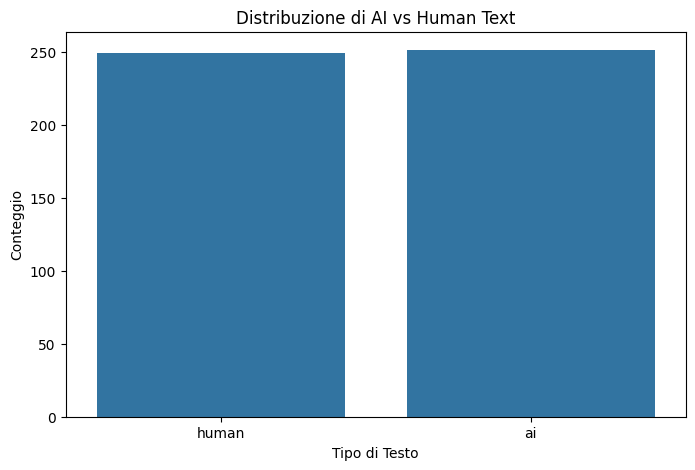

In [4]:
# Visualizza la distribuzione della colonna 'label'
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df)
plt.title('Distribuzione di AI vs Human Text')
plt.xlabel('Tipo di Testo')
plt.ylabel('Conteggio')
plt.show()

Distribuzione del Quality Score per Tipo di Testo (Istogramma):

Confronta la distribuzione dei punteggi di qualità (quality_score) per i testi umani e quelli generati dall'IA.
Aiuta a capire se ci sono differenze sistematiche nella qualità percepita tra i due tipi di testo. Per esempio, potremmo scoprire che i testi umani tendono ad avere punteggi di qualità più alti o più bassi.


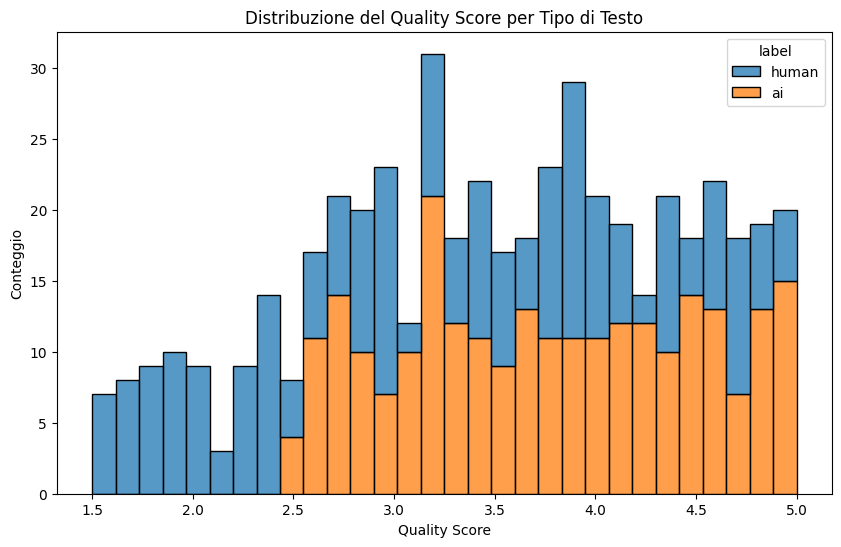

In [5]:
# Visualizza la distribuzione del quality_score per ogni label
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='quality_score', hue='label', multiple='stack', bins=30)
plt.title('Distribuzione del Quality Score per Tipo di Testo')
plt.xlabel('Quality Score')
plt.ylabel('Conteggio')
plt.show()

Distribuzione del Sentiment per Tipo di Testo (Istogramma):

Analizza la distribuzione del sentiment (positivo, negativo, neutro) per i testi umani e quelli dell'IA.
Permette di vedere se uno dei due gruppi tende a produrre testi con un sentiment prevalentemente positivo o negativo.

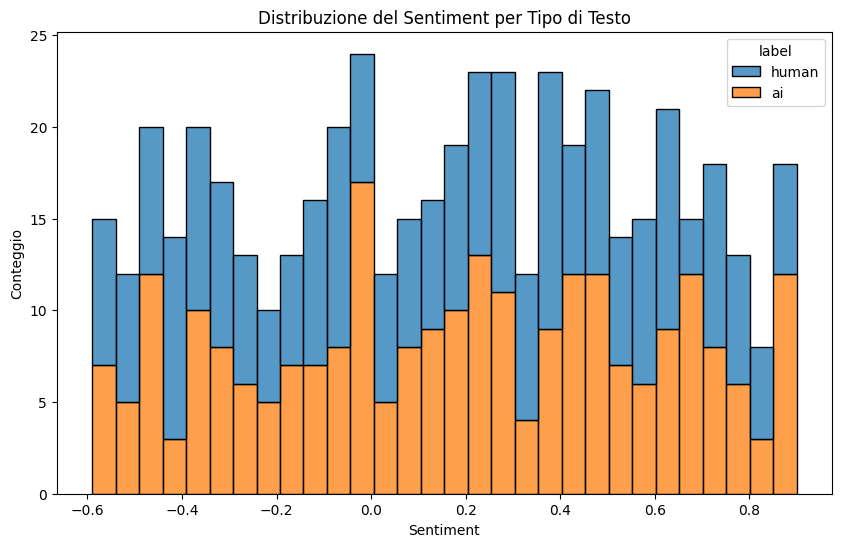

In [6]:
# Visualizza la distribuzione del sentiment per ogni label
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='sentiment', hue='label', multiple='stack', bins=30)
plt.title('Distribuzione del Sentiment per Tipo di Testo')
plt.xlabel('Sentiment')
plt.ylabel('Conteggio')
plt.show()

Distribuzione della Lunghezza dei Caratteri per Tipo di Testo (Boxplot):

Confronta la distribuzione della lunghezza dei testi, misurata in numero di caratteri (length_chars), tra le due categorie.
Il boxplot evidenzia la mediana, i quartili e gli eventuali outlier (valori anomali), permettendo di capire se, in media, i testi generati dall'IA sono più lunghi o più corti di quelli umani.

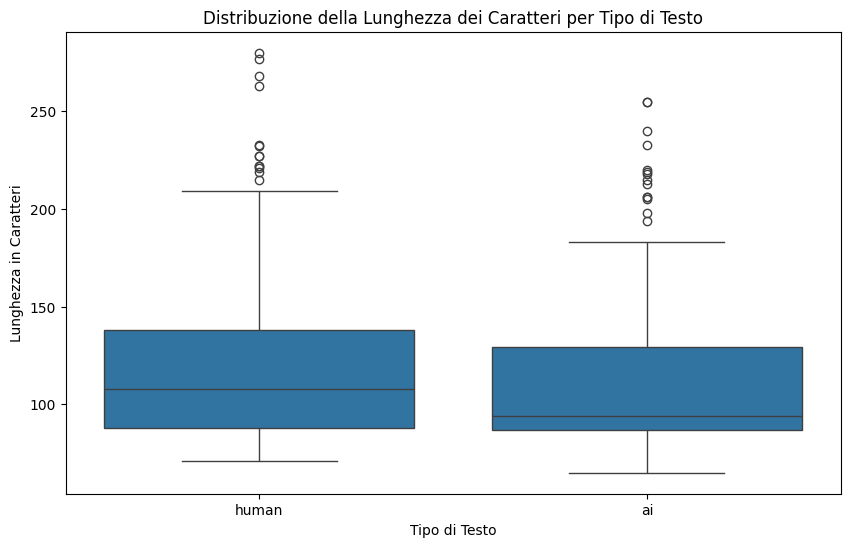

In [7]:
# Boxplot per 'length_chars' vs 'label'
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='length_chars', data=df)
plt.title('Distribuzione della Lunghezza dei Caratteri per Tipo di Testo')
plt.xlabel('Tipo di Testo')
plt.ylabel('Lunghezza in Caratteri')
plt.show()

Distribuzione della Lunghezza delle Parole per Tipo di Testo (Boxplot):

Simile al precedente, ma basato sul numero di parole (length_words).
Offre un'altra prospettiva sulla lunghezza dei testi, che può essere più significativa del conteggio dei caratteri.

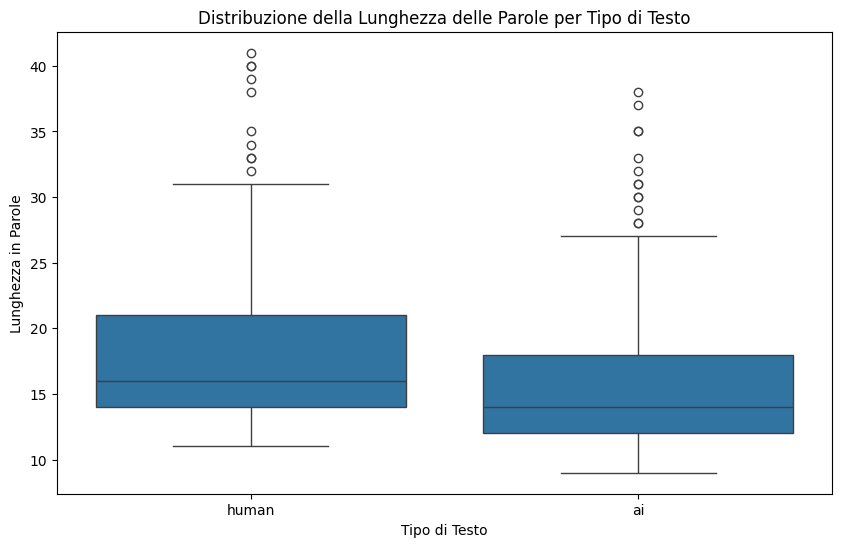

In [8]:
# Boxplot per 'length_words' vs 'label'
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='length_words', data=df)
plt.title('Distribuzione della Lunghezza delle Parole per Tipo di Testo')
plt.xlabel('Tipo di Testo')
plt.ylabel('Lunghezza in Parole')
plt.show()

Matrice di Correlazione delle Features Numeriche (Heatmap):

Visualizza la correlazione tra tutte le variabili numeriche del dataset. I colori più caldi (es. rosso) indicano una correlazione positiva forte, mentre i colori più freddi (es. blu) indicano una correlazione negativa forte.
Aiuta a identificare quali variabili sono legate tra loro. Ad esempio, una forte correlazione tra length_words e length_chars è prevedibile. Relazioni meno ovvie possono essere spunti per analisi più approfondite.

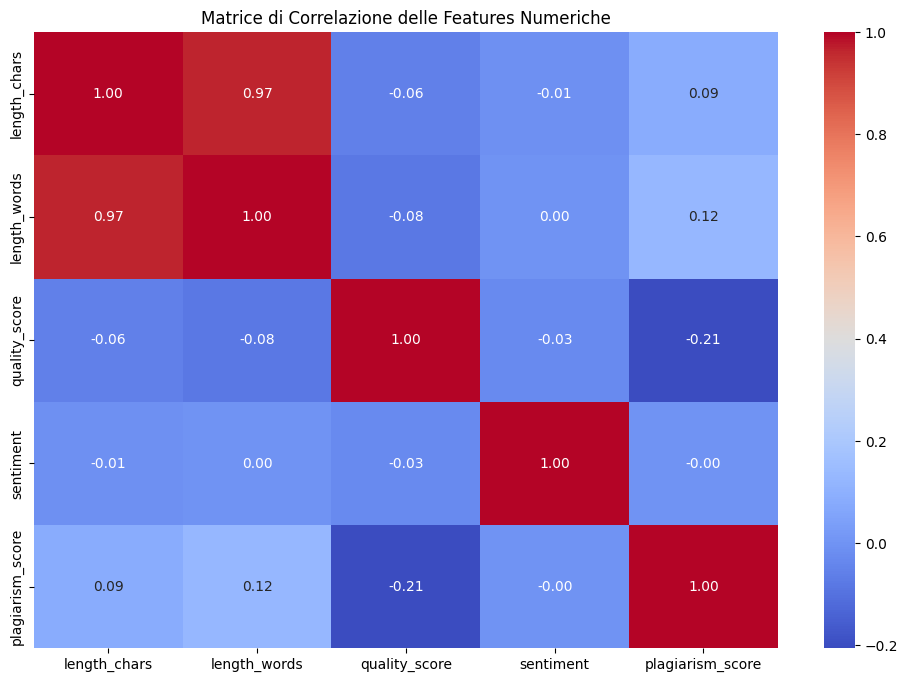

In [9]:
# Correlazione tra le features numeriche
numerical_features = df.select_dtypes(include=np.number)
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice di Correlazione delle Features Numeriche')
plt.show()

Distribuzione dei Topic nel Dataset (Grafico a Barre Orizzontali):

Fa un conteggio di quanti testi appartengono a ciascun argomento (topic).
Permette di vedere quali sono gli argomenti più comuni nel dataset e se la loro distribuzione è uniforme.

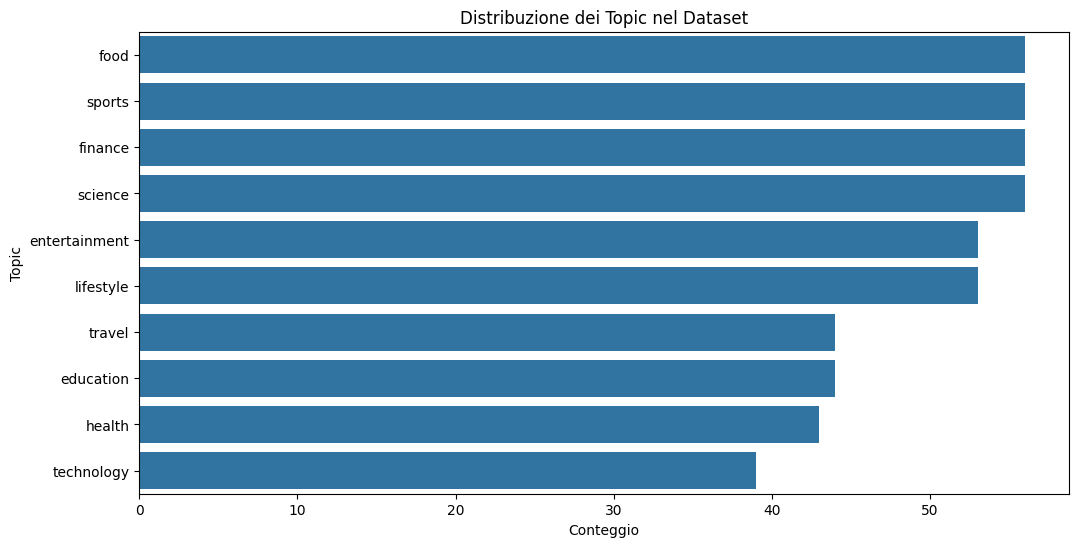

In [10]:
# Visualizza la distribuzione dei topic
plt.figure(figsize=(12, 6))
sns.countplot(y='topic', data=df, order = df['topic'].value_counts().index)
plt.title('Distribuzione dei Topic nel Dataset')
plt.xlabel('Conteggio')
plt.ylabel('Topic')
plt.show()

Distribuzione del Quality Score per Topic (Boxplot):

Analizza come varia il punteggio di qualità (quality_score) in base all'argomento del testo. 
Aiuta a capire se alcuni argomenti tendono a ricevere punteggi di qualità mediamente più alti o più bassi.

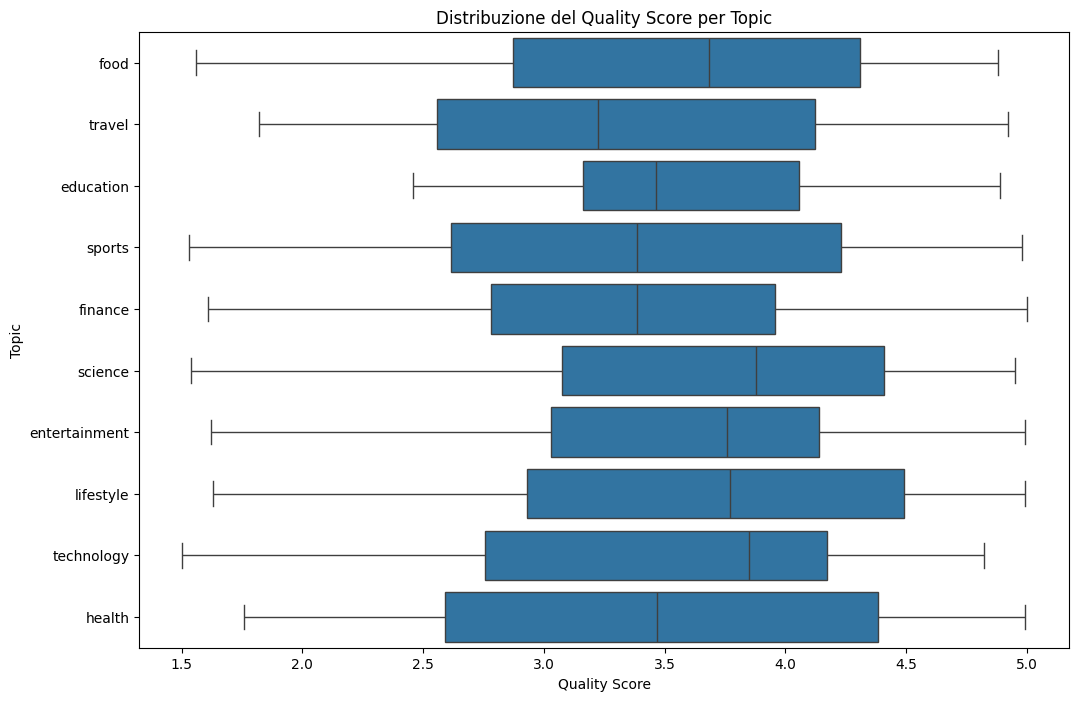

In [11]:
# Boxplot per 'quality_score' vs 'topic'
plt.figure(figsize=(12, 8))
sns.boxplot(x='quality_score', y='topic', data=df)
plt.title('Distribuzione del Quality Score per Topic')
plt.xlabel('Quality Score')
plt.ylabel('Topic')
plt.show()

Distribuzione del Plagiarism Score per Tipo di Testo (Istogramma):

Confronta la distribuzione dei punteggi di plagio (plagiarism_score) tra testi umani e generati dall'IA.
Serve a verificare se i testi generati dall'IA hanno una tendenza maggiore o minore al plagio rispetto a quelli umani, secondo la metrica utilizzata.

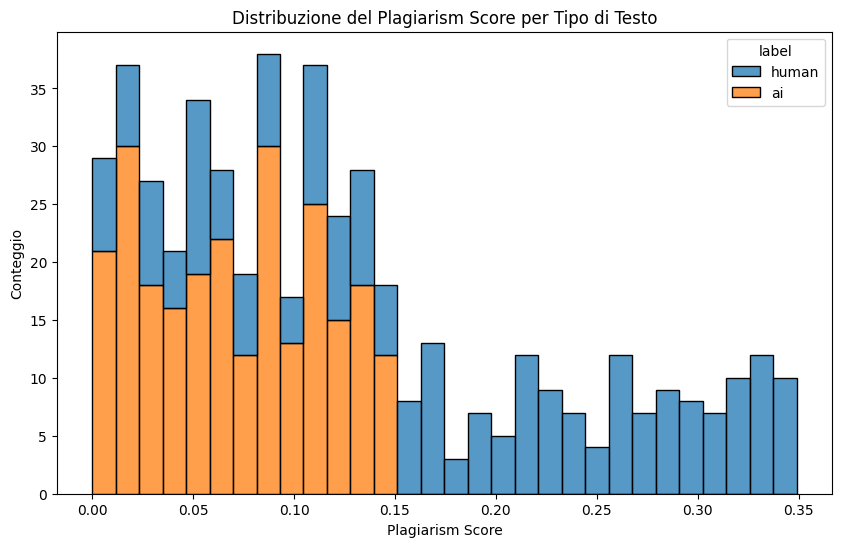

In [12]:
# Distribuzione del plagiarism_score
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='plagiarism_score', hue='label', multiple='stack', bins=30)
plt.title('Distribuzione del Plagiarism Score per Tipo di Testo')
plt.xlabel('Plagiarism Score')
plt.ylabel('Conteggio')
plt.show()

Grafico a Violino per Word Count

Questo grafico a violino confronta la distribuzione del conteggio delle parole tra il testo generato dall'IA (0) e quello scritto da umani (1). Permette di visualizzare la densità e la distribuzione dei dati per ciascuna categoria. Offre una visione più dettagliata della distribuzione rispetto al boxplot, mostrando dove si concentrano i valori e se la distribuzione è bimodale o ha altre forme particolari.

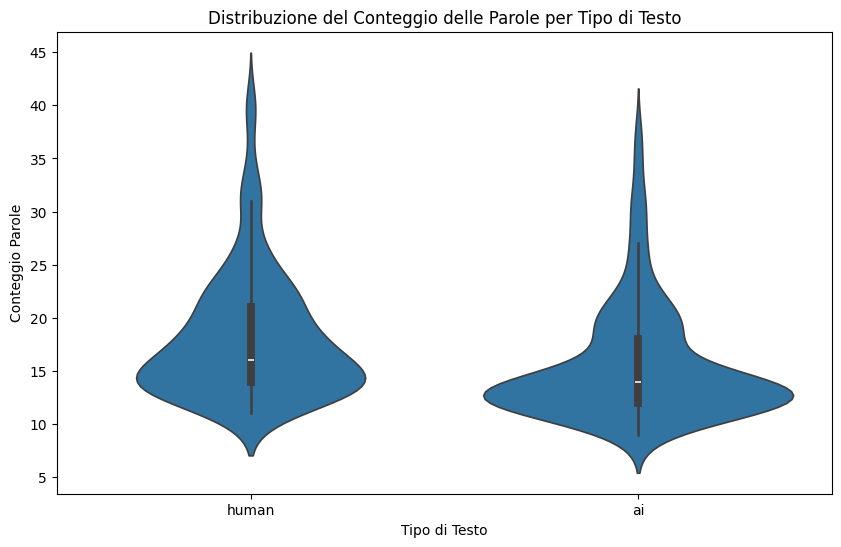

In [13]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='label', y='length_words', data=df)
plt.title('Distribuzione del Conteggio delle Parole per Tipo di Testo')
plt.xlabel('Tipo di Testo')
plt.ylabel('Conteggio Parole')
plt.show()

Grafico a Punti 

Mette in relazione la lunghezza delle parole (length_words) con il punteggio di qualità (quality_score), colorando i punti in base alla categoria (umano o IA).
Permette di cercare pattern o cluster. Ad esempio, potremmo scoprire che per i testi umani, una maggiore lunghezza è correlata a una qualità superiore, mentre per l'IA questa relazione non sussiste.

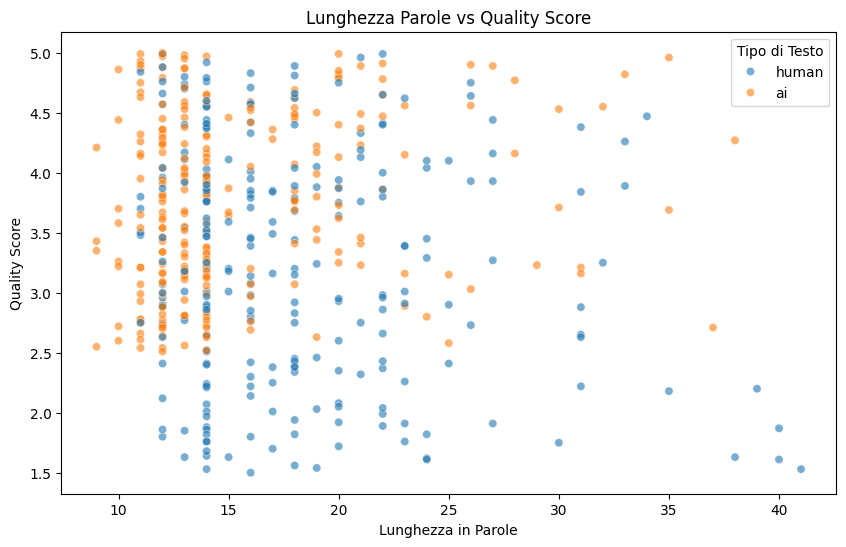

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='length_words', y='quality_score', hue='label', data=df, alpha=0.6)
plt.title('Lunghezza Parole vs Quality Score')
plt.xlabel('Lunghezza in Parole')
plt.ylabel('Quality Score')
plt.legend(title='Tipo di Testo')
plt.show()